# Ecommerce Customer Data

In this project, we will explore data from an ecommerce company based in NYC that sells clothing online but also has in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. We will analyze customer data to determine what steps should be taken. 

The dataset used is provided in the repository.

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 1. Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

In [5]:
customers = pd.read_csv("Ecommerce Customers")

In [6]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## 2. Exploratory Data Analysis

In [9]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

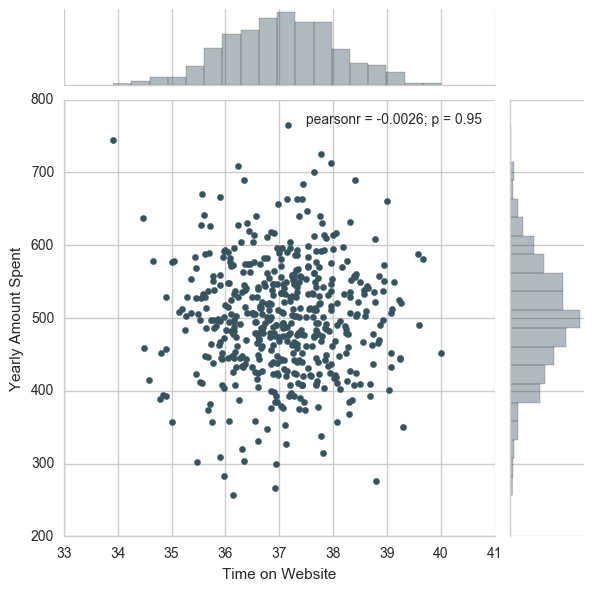

In [12]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

There isn't a correlation between the amount of time a customer spends on the website and the amount a customer spends on the website in a year. People who spend more time on the website are not necessarily more inclined to spend money. 

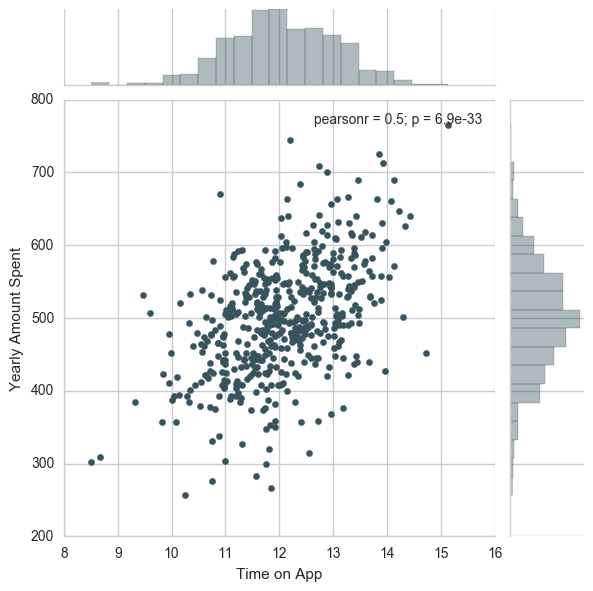

In [13]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

Unlike the previous plot, here we see there is some positive correlation between the amount of time a customer spends on the app and the amount of money a customer spends on the website. Customers who spend more time on the app tend to spend more money in a year. 

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

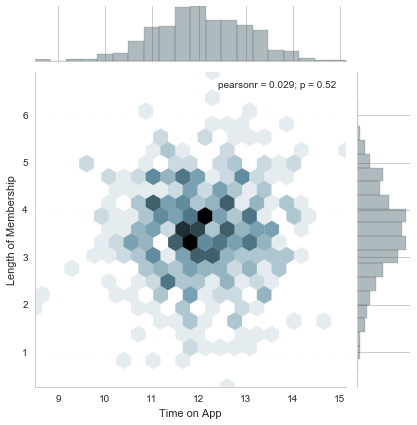

In [283]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

We can explore the relationships between variables across the entire dataset. 

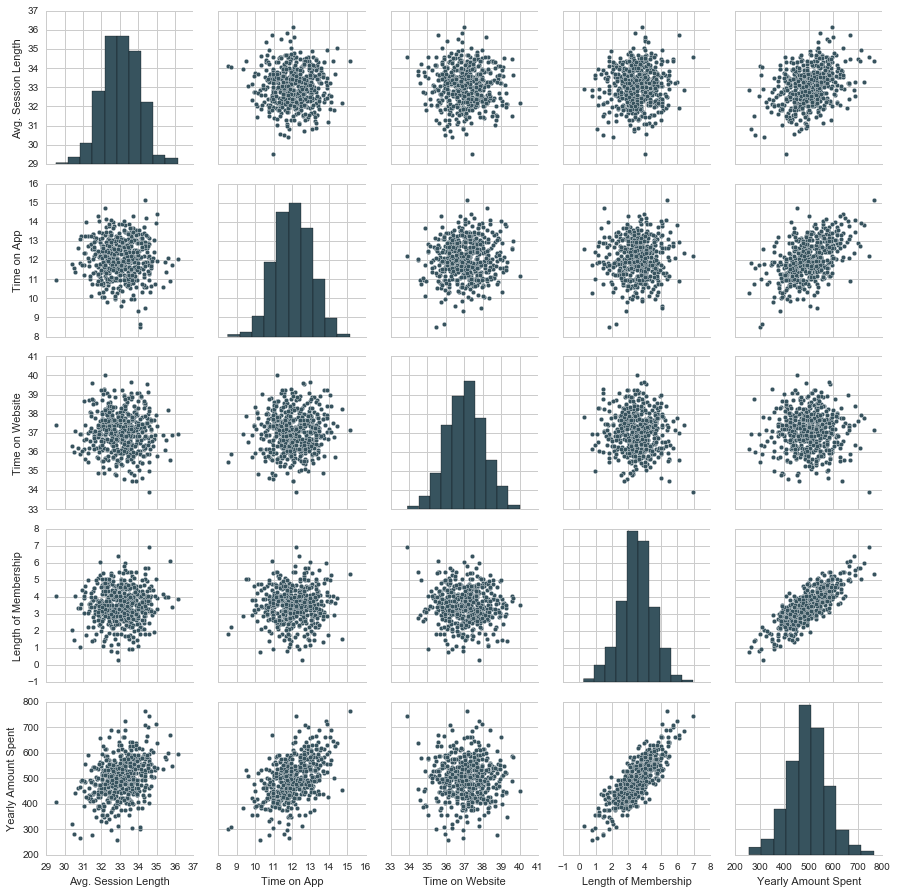

In [284]:
sns.pairplot(customers)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

The most correlated feature with Yearly Amount Spent looks to be Length of Membership - customers who have been members longer tend to spend more per year. We can confirm this with a heatmap.

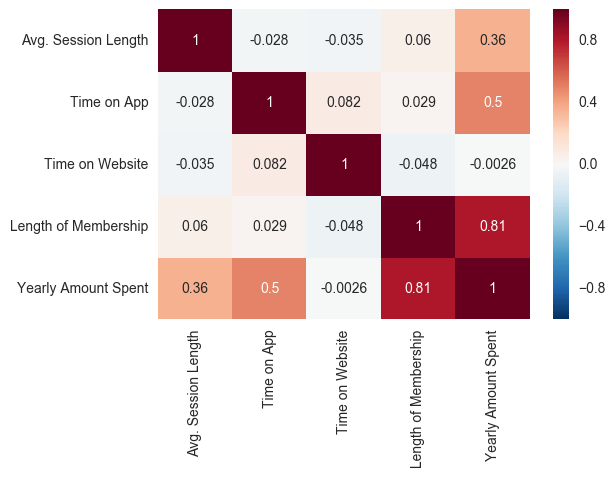

In [15]:
sns.heatmap(customers.corr(), annot=True)

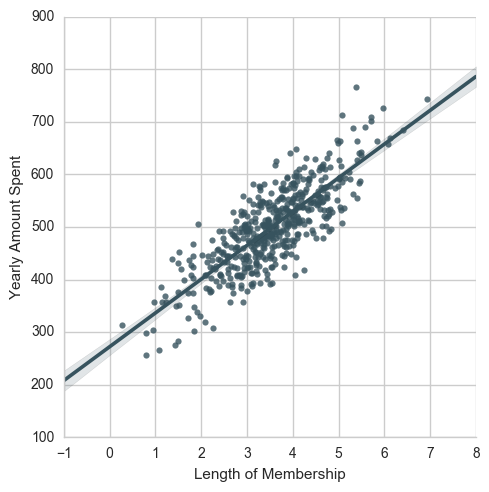

In [16]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## 3. Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
We will use our numerical features to predict the y value, Yearly Amount Spent.

In [17]:
y = customers['Yearly Amount Spent']

In [18]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

In [21]:
from sklearn.linear_model import LinearRegression

In [24]:
# Create instance of model
lm = LinearRegression()

In [25]:
# Fit model to our training data
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 25.98154972  38.59015875   0.19040528  61.27909654]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values.

In [27]:
predictions = lm.predict(X_test)

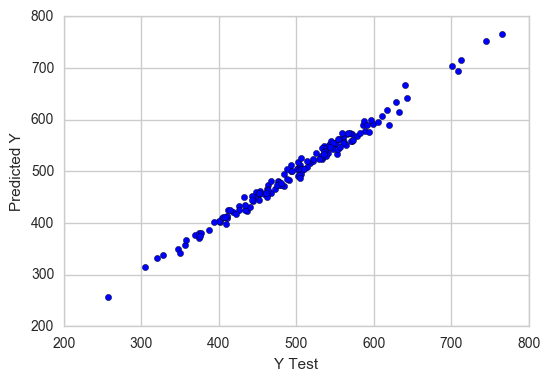

In [28]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

In [30]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.22814865343
MSE: 79.813051651
RMSE: 8.93381506698


## Residuals

Our model seems to be a good fit for the testing data and we can see the distribution of residuals - the more normal the distribution the better our model. 

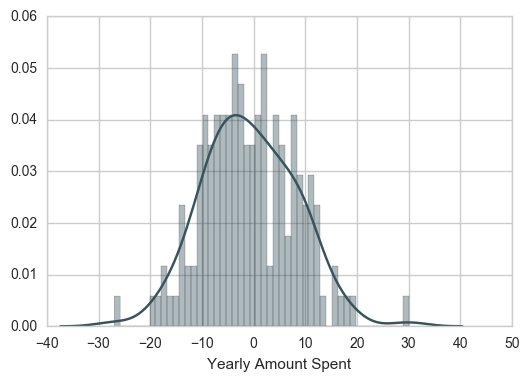

In [31]:
sns.distplot((y_test-predictions),bins=50);

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforts on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

In [32]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

**Should the company focus more on their mobile app or on their website?**

Compared to the app, the website is very far behind in terms of influencing the customer to spend more money. Looking above at the pair plot, we can see customers spend much less time on the app than on the website. If the app is more convenient to use, we want to transform the website to a version that's closer to the functionality of the app. Additionally, Length of Membership does not seem to affect whether a customer uses the app or the website, so it would be beneficial to improve the website.  If the company wanted to further develop the app, it should be sure that a noticeable increase in customer spending would be the result - there might not be much more improvement since the coefficient is already so high. 